In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import datetime as dt
py.init_notebook_mode(connected=True)
%matplotlib inline

# 1.0 - Loading DataFrame and Changing Names

In [2]:
file = "./DataSets//gas-prices-in-brazil//2004-2019.tsv"

In [3]:
df1 = pd.read_table(file)
df1.drop("Unnamed: 0", axis=1,inplace=True)

In [4]:
df1.rename(columns = {
        "DATA INICIAL": "init_date",
        "DATA FINAL": "final_date",
        "REGIÃO": "region",
        "ESTADO": "state",
        "PRODUTO": "product",
        "NÚMERO DE POSTOS PESQUISADOS": "n_stations",
        "UNIDADE DE MEDIDA": "unity",
        "PREÇO MÉDIO REVENDA": "avg_price",
        "DESVIO PADRÃO REVENDA": "price_dp",
        "PREÇO MÍNIMO REVENDA": "min_price",
        "PREÇO MÁXIMO REVENDA": "max_price",
        "MARGEM MÉDIA REVENDA": "mean_margin",
        "ANO": "year",
        "MÊS": "month",
        "COEF DE VARIAÇÃO DISTRIBUIÇÃO": "dist_coef",
        "PREÇO MÁXIMO DISTRIBUIÇÃO": "dist_max_price",
        "PREÇO MÍNIMO DISTRIBUIÇÃO": "dist_min_price",
        "DESVIO PADRÃO DISTRIBUIÇÃO": "dist_dp_price",
        "PREÇO MÉDIO DISTRIBUIÇÃO": "dist_mean_price",
        "COEF DE VARIAÇÃO REVENDA": "var_coef"},inplace=True)

# 2.0 - Exploratory Data Analysis

In [5]:
## Check for NULL values
df1.isnull().sum()

init_date          0
final_date         0
region             0
state              0
product            0
n_stations         0
unity              0
avg_price          0
price_dp           0
min_price          0
max_price          0
mean_margin        0
var_coef           0
dist_mean_price    0
dist_dp_price      0
dist_min_price     0
dist_max_price     0
dist_coef          0
month              0
year               0
dtype: int64

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 20 columns):
init_date          106823 non-null object
final_date         106823 non-null object
region             106823 non-null object
state              106823 non-null object
product            106823 non-null object
n_stations         106823 non-null int64
unity              106823 non-null object
avg_price          106823 non-null float64
price_dp           106823 non-null float64
min_price          106823 non-null float64
max_price          106823 non-null float64
mean_margin        106823 non-null object
var_coef           106823 non-null float64
dist_mean_price    106823 non-null object
dist_dp_price      106823 non-null object
dist_min_price     106823 non-null object
dist_max_price     106823 non-null object
dist_coef          106823 non-null object
month              106823 non-null int64
year               106823 non-null int64
dtypes: float64(5), int64(3), object(12)
memory

### Columns in Object that is a NUMBER
**dist_mean_price        106823 non-null object  
dist_dp_price          106823 non-null object  
dist_min_price         106823 non-null object  
dist_max_price         106823 non-null object  
dist_coef              106823 non-null object**  
  
When tried to convert directly get "could not convert string to float: '-'", so need clean

In [7]:
float_list = ['dist_mean_price','dist_dp_price','dist_min_price','dist_max_price','dist_coef']

In [8]:
## Remove '-' to avoid error
for column in float_list:
    df1[column] = df1[column].str.replace("-", "0")

df1[float_list] = df1[float_list].astype('float64')

In [9]:
## Check Products
df1['product'].value_counts()

ÓLEO DIESEL         21194
GASOLINA COMUM      21194
GLP                 21186
ETANOL HIDRATADO    21102
GNV                 13034
ÓLEO DIESEL S10      9113
Name: product, dtype: int64

In [10]:
df1['unity'].value_counts()

R$/l       72603
R$/13Kg    21186
R$/m3      13034
Name: unity, dtype: int64

## 2.1 - Change Names

In [11]:
## Change Product Names
products = {'ÓLEO DIESEL': 'diesel', 'GASOLINA COMUM':'gas', 'GLP': 'glp', 'ETANOL HIDRATADO': 'alcohol', 
            'GNV': 'gnv', 'ÓLEO DIESEL S10': 's10' }

df1['product'] = df1['product'].map(products)

In [12]:
## Change Unity
unity = {'R$/l':'liter' ,'R$/13Kg':'13kg' ,'R$/m3':'m30'}

df1['unity'] = df1['unity'].map(unity)

## 2.2 - Outliers

In [13]:
## Check outliers on avg price
print("Max avg price:", float(df1[df1.avg_price==df1.avg_price.max()].avg_price.values))
print("Min avg price:", float(df1[df1.avg_price==df1.avg_price.min()].avg_price.values))


Max avg price: 99.357
Min avg price: 0.7659999999999999


**Max value on GLP product, lets check mean and median**

In [14]:
print("Mean:",df1[df1['product']=='glp'].avg_price.mean())
print("Median:",df1[df1['product']=='glp'].avg_price.median())

Mean: 44.513081374492394
Median: 40.154


In [15]:
## Check values over mean
glp = df1[(df1['product']=='glp')]
list_years_over = list(glp[glp.avg_price>=glp.avg_price.mean()].year.value_counts().index)
list_years_over.sort()
print("Years with GLP over mean:", list_years_over)

Years with GLP over mean: [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


**For now I will not treat this data because my main goal is to work with most common fuel like gas, alcohol... and also because this values isn't so worrying**

### Check avg price for other columns

In [16]:
year_price = df1.groupby(['product','year','avg_price','max_price']).mean().reset_index()[['product','year','avg_price','max_price']]

In [17]:
## Get Max Avg Price over year
main_products = ['gas', 'alcohol', 'diesel','s10','gnv']
year_price[year_price.avg_price==year_price[(year_price['product'].isin(main_products))].avg_price.max()]

,product,year,avg_price,max_price
51524,gas,2018,5.362,5.759


In [18]:
## Get Max Value over year 
year_price[year_price.max_price==year_price[(year_price['product'].isin(main_products))].max_price.max()].max_price.values[0]

6.29

**No worrying outliers on this data**

# 3.0 - Data Analysis and Visualization

In [19]:
## Create Aux datasets for mainly fuel (Gas,Alcohol and Diesel)

df_gas = df1[df1['product'].str.lower()=='gas']
df_alc = df1[df1['product'].str.lower()=='alcohol']
df_die = df1[df1['product'].str.lower()=='diesel']

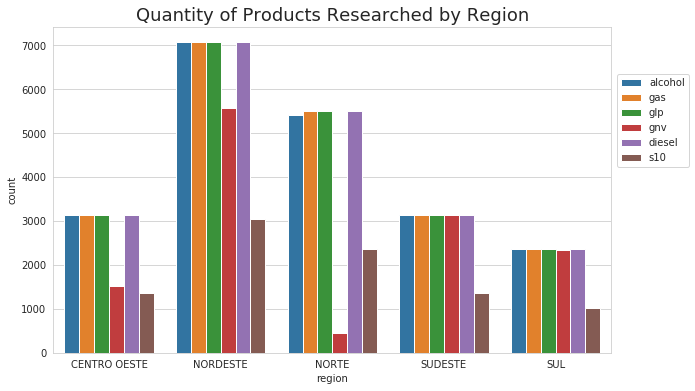

In [20]:
## Quantity of Products researched by region
plt.figure(figsize=(10,6))
sns.countplot(x='region', data=df1, hue='product')
plt.title('Quantity of Products Researched by Region', fontsize=18)
plt.legend(loc=(1.01,0.57))

# 3.1 - Gas Fuel Analysis

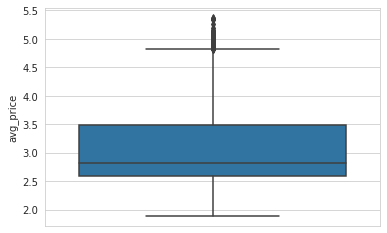

In [21]:
## Check Avg Price values
sns.boxplot(y=df_gas.avg_price)

In [22]:
## Group Gas by region and year and apply mean
gas_group = df_gas.groupby(['year','region']).mean().reset_index()

In [26]:
gas_group

,year,region,n_stations,avg_price,price_dp,min_price,max_price,var_coef,dist_mean_price,dist_dp_price,dist_min_price,dist_max_price,dist_coef,month
0,2004,CENTRO OESTE,223.375000,2.288507,0.061257,2.113537,2.445801,0.026772,1.934676,0.040544,1.830594,2.110449,0.020831,8.529412
1,2004,NORDESTE,225.143791,2.186523,0.072029,2.000768,2.362608,0.033029,1.863134,0.037974,1.761778,1.997732,0.020402,8.529412
2,2004,NORTE,94.789916,2.351059,0.100534,2.136168,2.627164,0.042101,1.929945,0.044353,1.817723,2.044792,0.023025,8.529412
3,2004,SUDESTE,1703.345588,2.126941,0.090971,1.848309,2.450890,0.042934,1.858706,0.046897,1.663766,2.121738,0.025390,8.529412
4,2004,SUL,696.529412,2.217078,0.082480,1.983059,2.507922,0.037206,1.899588,0.046265,1.763762,2.193687,0.024382,8.529412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2019,CENTRO OESTE,130.410000,4.347360,0.166450,4.037390,4.829650,0.038430,3.900890,0.081750,3.763968,4.117235,0.021030,3.480000
76,2019,NORDESTE,128.982222,4.419596,0.162080,4.148582,4.858729,0.036969,3.929391,0.081849,3.790254,4.143173,0.020916,3.480000
77,2019,NORTE,55.040000,4.382480,0.201909,4.109051,5.002160,0.046583,3.848931,0.088880,3.712751,4.056194,0.023240,3.480000
78,2019,SUDESTE,690.040000,4.519000,0.168280,4.100090,5.217410,0.037550,4.061740,0.098380,3.759661,4.358313,0.024300,3.480000


In [28]:
fig = px.line(gas_group, x='year',y='avg_price', color='region')
fig.update_layout(
    title={
        'text':"Average Resale Price per Region over Years",
        'y':0.95,
        'x':0.45,
        'xanchor':'center',
        'yanchor':'top'},
    xaxis_title="Years",
    yaxis_title="Price",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

In [27]:
fig = px.line(gas_group, x='year',y='dist_mean_price', color='region')
fig.update_layout(
    title={
        'text':"Average Distribuition Price per Region over Years",
        'y':0.95,
        'x':0.45,
        'xanchor':'center',
        'yanchor':'top'},
    xaxis_title="Years",
    yaxis_title="Price",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

# 4.0 - Gas Prediction

In [174]:
from sklearn.metrics import mean_squared_log_error

## 4.1 - Preparation 

In [144]:
## Changing to datetime
df_gas['final_date'] = pd.to_datetime(df_gas['final_date'])
df_gas['init_date'] = pd.to_datetime(df_gas['init_date'])

/home/vinicius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/vinicius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [165]:
train_gas = df_gas[df_gas['final_date']<'2014-01-01']
valid_gas = df_gas[df_gas['final_date']>='2014-01-01']

## 4.2 - Baseline
**Use last week price as baseline**

In [166]:
y_train = train_gas['avg_price']
y_valid = valid_gas['avg_price']

In [167]:
train_baseline = train_gas.groupby(['state'])['avg_price'].shift(1)
valid_baseline = valid_gas.groupby(['state'])['avg_price'].shift(1)

In [168]:
train_gas['baseline'] = train_baseline
valid_gas['baseline'] = valid_baseline

/home/vinicius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/vinicius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [179]:
## Check baseline error
np.sqrt(mean_squared_log_error(y_valid[valid_baseline.notnull()],
                              valid_baseline[valid_baseline.notnull()]))

0.011376097292341902

## 4.3 - Target Preparation

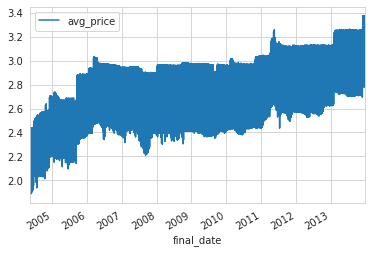

In [182]:
train_gas.plot(x='final_date',y='avg_price')

**This time serie probably isn't stationary**  
Will create new column aiming to get a stationary serie

In [183]:
def target_diff(x):
    return x.diff().shift(-1)

In [184]:
train_gas['diff'] = train_gas.groupby(['state'])['avg_price'].apply(target_diff)

/home/vinicius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



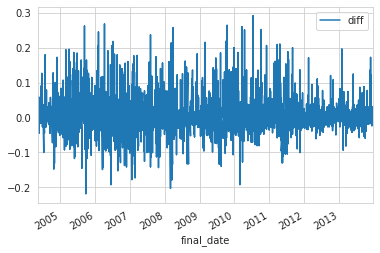

In [189]:
train_gas.plot(x='final_date',y='diff')

**This is more estable**

## 4.1 - Mapping some variables

In [115]:
## Create a Map for region values
region_map = {'NORDESTE':0, 'NORTE':0.25, 'SUDESTE':0.50, 'CENTRO OESTE':0.75, 'SUL':1}
gas['region_map'] = gas['region'].map(region_map)
gas.drop('region', axis=1,inplace=True)

In [116]:
state_map = {'PARA':0, 'PERNAMBUCO':0.1, 'RIO GRANDE DO NORTE':0.2, 'DISTRITO FEDERAL':0.3,
       'CEARA':0.4, 'MINAS GERAIS':0.5, 'SAO PAULO':0.6, 'SERGIPE':0.6, 'SANTA CATARINA':0.7,
       'PIAUI':0.8, 'ESPIRITO SANTO':0.9, 'PARANA':1, 'MATO GROSSO':1.1, 'ALAGOAS':1.2, 'GOIAS':1.2,
       'TOCANTINS':1.3, 'RIO DE JANEIRO':1.4, 'MATO GROSSO DO SUL':1.5,
       'RIO GRANDE DO SUL':1.6, 'PARAIBA':1.7, 'BAHIA':1.8, 'AMAZONAS':1.9, 'RONDONIA':2, 'ACRE':2.1,
       'MARANHAO':2.2, 'RORAIMA':2.3, 'AMAPA':2.4}
gas['state_map'] = gas['state'].map(state_map)
gas.drop('state', axis=1,inplace=True)

## 4.2 - DateTimes

In [117]:
## Convert Object to datetime
gas['final_date'] = pd.to_datetime(gas['final_date'])

In [118]:
## Add Columns Year Day
gas['year_day'] = gas['final_date'].dt.dayofyear

In [119]:
gas

,final_date,avg_price,month,year,region_map,state_map,year_day
12064,2004-05-15,2.029,5,2004,0.75,0.3,136
12065,2004-05-15,2.025,5,2004,0.75,1.2,136
12066,2004-05-15,2.358,5,2004,0.75,1.1,136
12067,2004-05-15,2.120,5,2004,0.75,1.5,136
12068,2004-05-15,2.090,5,2004,0.00,1.2,136
...,...,...,...,...,...,...,...
106776,2019-06-29,4.156,6,2019,0.25,2.3,180
106777,2019-06-29,4.087,6,2019,1.00,0.7,180
106778,2019-06-29,4.142,6,2019,0.50,0.6,180
106779,2019-06-29,4.400,6,2019,0.00,0.6,180
